In [22]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

<ipython-input-24-c3ae8881a5f3>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 8))


<Figure size 1152x576 with 0 Axes>

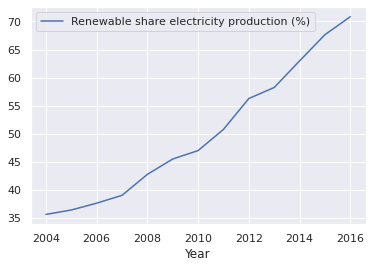

<Figure size 1152x576 with 0 Axes>

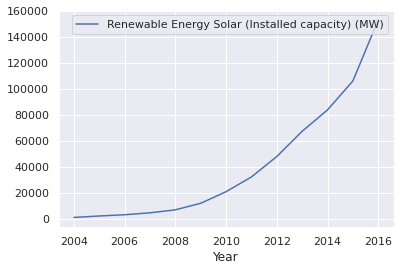

<Figure size 1152x576 with 0 Axes>

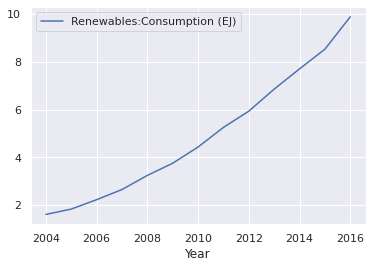

<Figure size 1152x576 with 0 Axes>

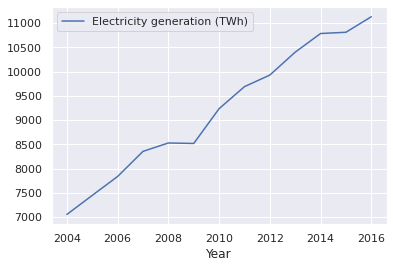

<Figure size 1152x576 with 0 Axes>

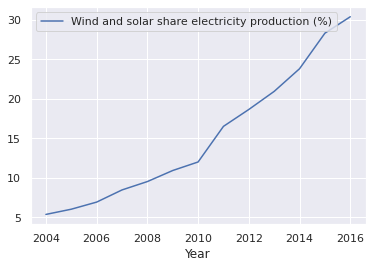

<Figure size 1152x576 with 0 Axes>

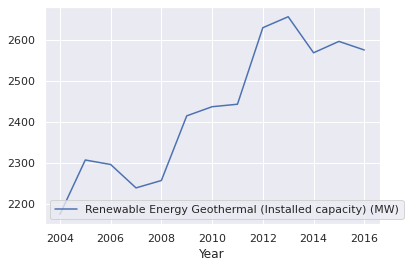

<Figure size 1152x576 with 0 Axes>

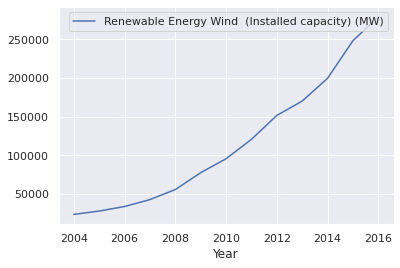

<Figure size 1152x576 with 0 Axes>

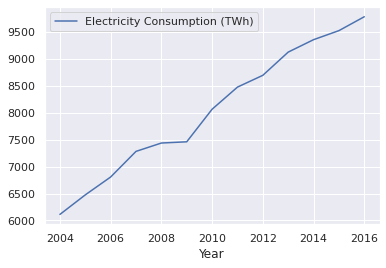

<Figure size 1152x576 with 0 Axes>

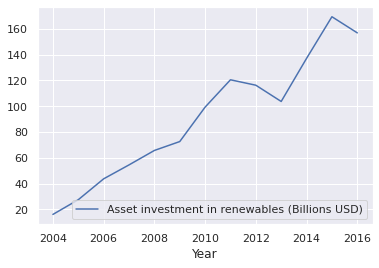

<Figure size 1152x576 with 0 Axes>

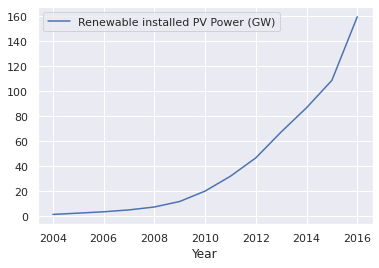

<Figure size 1152x576 with 0 Axes>

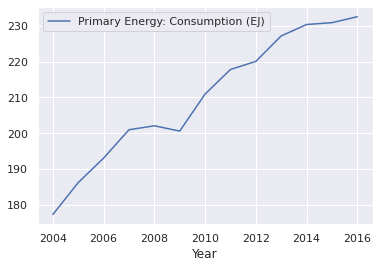

<Figure size 1152x576 with 0 Axes>

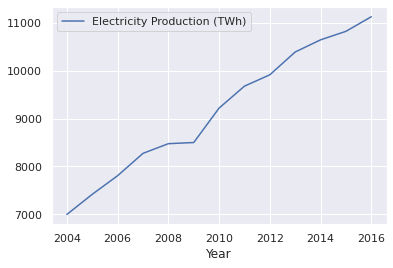

<Figure size 1152x576 with 0 Axes>

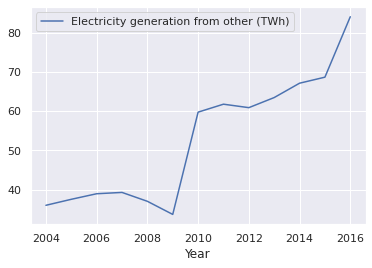

<Figure size 1152x576 with 0 Axes>

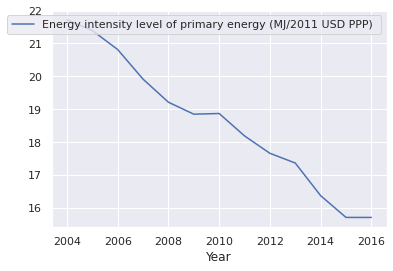

<Figure size 1152x576 with 0 Axes>

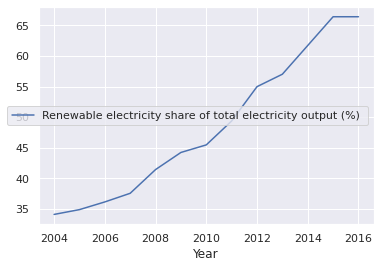

<Figure size 1152x576 with 0 Axes>

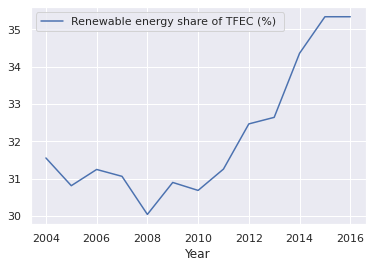

<Figure size 1152x576 with 0 Axes>

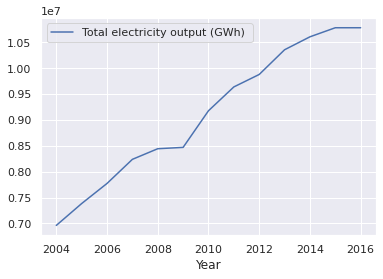

<Figure size 1152x576 with 0 Axes>

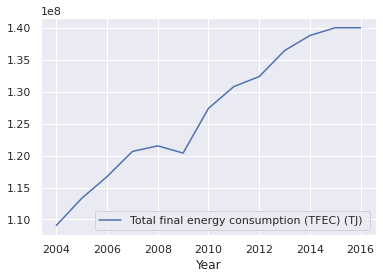

<Figure size 1152x576 with 0 Axes>

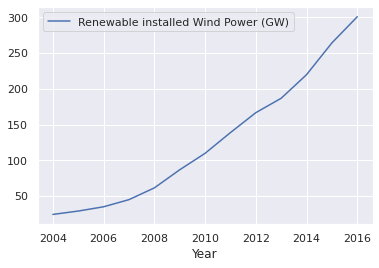

In [24]:
df = pd.read_csv('./energy.csv', index_col=0)

for column in df.columns:
    if column in ['Country', 'Year']:
        continue
    
    g = df[['Country', 'Year', column]]
    g = g.groupby('Year').sum()
    
    plt.figure(figsize=(16, 8))
    g.plot()

[Text(0.5, 0, 'Renewable share electricity production (%)'),
 Text(1.5, 0, 'Renewable Energy Solar (Installed capacity) (MW)'),
 Text(2.5, 0, 'Renewables:Consumption (EJ)'),
 Text(3.5, 0, 'Electricity generation (TWh)'),
 Text(4.5, 0, 'Wind and solar share electricity production (%)'),
 Text(5.5, 0, 'Renewable Energy Geothermal (Installed capacity) (MW)'),
 Text(6.5, 0, 'Renewable Energy Wind  (Installed capacity) (MW)'),
 Text(7.5, 0, 'Electricity Consumption (TWh)'),
 Text(8.5, 0, 'Asset investment in renewables (Billions USD)'),
 Text(9.5, 0, 'Renewable installed PV Power (GW)'),
 Text(10.5, 0, 'Primary Energy: Consumption (EJ)'),
 Text(11.5, 0, 'Electricity Production (TWh)'),
 Text(12.5, 0, 'Electricity generation from other (TWh)'),
 Text(13.5, 0, 'Energy intensity level of primary energy (MJ/2011 USD PPP) '),
 Text(14.5, 0, 'Renewable electricity share of total electricity output (%) '),
 Text(15.5, 0, 'Renewable energy share of TFEC (%) '),
 Text(16.5, 0, 'Total electricity out

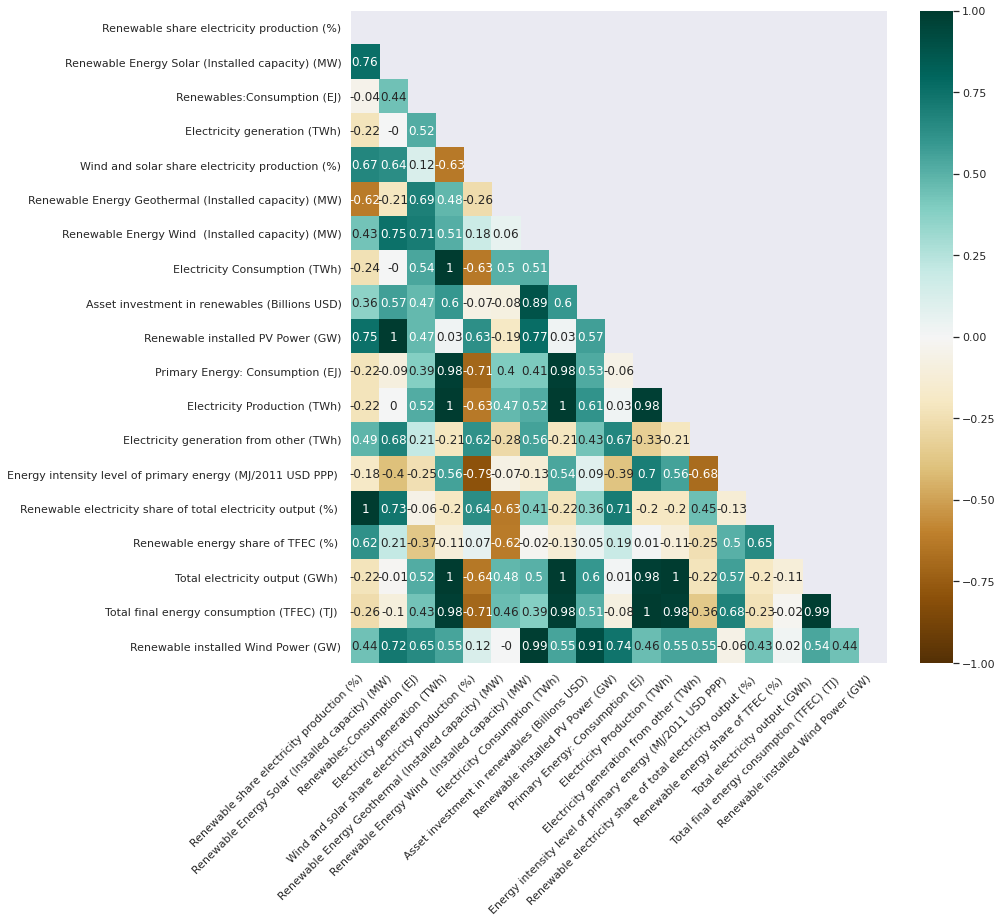

In [26]:
plt.figure(figsize=(12, 12))

corr = np.round(df.drop('Year', axis=1).corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))

h = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')